##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [18]:
# Load data
data = np.loadtxt("data.txt", delimiter=',')
X_train = data[:, :2]
y_train = data[:, 2]

# Standardize shapes
y_train = y_train.reshape(-1, 1)

In [19]:
def plot_data(X, y, positive_label="y=1", negative_label="y=0"):
    # indices of positive and negative examples
    positive = (y == 1).flatten()
    negative = (y == 0).flatten()

    # examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=positive_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=negative_label)

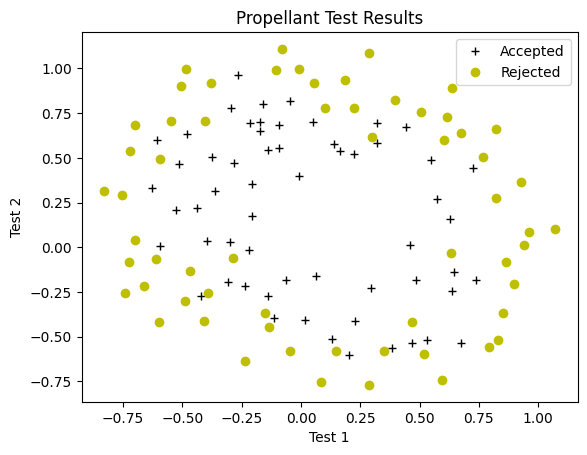

In [20]:
# Creating the plot
plot_data(X_train, y_train, positive_label="Accepted", negative_label="Rejected")

# labels and legend
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc="upper right")
plt.title('Propellant Test Results')
plt.show()

In [21]:
def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1**(i - j) * (X2**j)))
    return np.stack(out, axis=1)

In [22]:
print("Original shape of data:", X_train.shape)


mapped_X = map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [23]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
sigmoid_test(sigmoid)


Tests passed!


In [26]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [38]:
def compute_cost(X, y, w, b, lambda_=None):
    m = X.shape[0]

    y = y.reshape(-1)

    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    epsilon = 1e-15
    cost = -np.mean(y * np.log(f_wb + epsilon) + (1 - y) * np.log(1 - f_wb + epsilon))
    return cost

In [39]:
# @title Default title text
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [40]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m = X.shape[0]
    cost = compute_cost(X, y, w, b)
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    return cost + reg_cost

In [41]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [42]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6618252552483931
All tests passed!


In [43]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [44]:
def compute_gradient(X, y, w, b, lambda_=None):
    m = X.shape[0]

    y = y.reshape(-1)

    f_wb = sigmoid(np.dot(X, w) + b)
    error = f_wb - y

    dj_dw = np.dot(X.T, error) / m
    dj_db = np.sum(error) / m

    return dj_db, dj_dw

In [45]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465381, -0.09147300847306207]
Tests passed!


In [46]:
def compute_gradient_reg(X, y, w, b, lambda_=1):
    m = X.shape[0]
    dj_db, dj_dw = compute_gradient(X, y, w, b)


    dj_dw = dj_dw + (lambda_ / m) * w

    return dj_db, dj_dw

In [47]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [48]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343654
Tests passed!


In [81]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 10000
alpha = 0.01
def gradient_descent(X, y, initial_w, initial_b, cost_fn, grad_fn, alpha, iterations, lambda_):
    w = initial_w
    b = initial_b
    J_history = []

    for i in range(iterations):
        dj_db, dj_dw = grad_fn(X, y, w, b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(cost_fn(X, y, w, b, lambda_))

    return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

In [82]:

def plot_decision_boundary(w, b, X, y):

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        #  simple linear boundary
        plot_x = np.array([min(X[:, 0]), max(X[:, 1])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        plt.plot(plot_x, plot_y, c="b")
    else:
        #  polynomial boundary (like the propellant test)
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))

        for i in range(len(u)):
            for j in range(len(v)):
                # CHANGED 'sig' to 'sigmoid' here
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)

        z = z.T
        plt.contour(u, v, z, levels=[0.5], colors="g")
        plt.title("Decision Boundary")

/tmp/ipython-input-3231276874.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


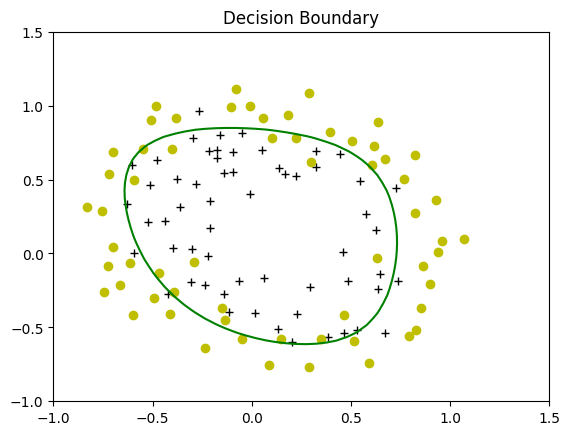

In [83]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [84]:
def predict(X, w, b):
    # Calculate probabilities
    f_wb = sigmoid(np.dot(X, w) + b)
    # If prob >= 0.5, predict 1, else 0
    p = (f_wb >= 0.5).astype(int)
    return p

In [85]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f' % (np.mean(p == y_train.reshape(-1)) * 100))

Accuracy of training model: 82.203390
